In [ ]:

def get_protruding_cells_room_number(floorplan, room_number):
    row, col = find_coordinates(floorplan, room_number)
    protruding_cells_room = []
    if room_number > 0:
        neighbors = all_active_neighbors((row, col), floorplan)
        different_neighbors = sum(floorplan[neighbor] != room_number for neighbor in neighbors)
        diff_ratio = different_neighbors / len(neighbors)
        if diff_ratio > threshold_diff_ratio:
            protruding_cells_room.append((row, col))
    return protruding_cells_room


def if_protruding_cell(floorplan, cell):
    neighbors = all_active_neighbors(cell, floorplan)
    room_number = floorplan[cell]
    different_neighbors = sum(floorplan[neighbor] != room_number for neighbor in neighbors)
    diff_ratio = different_neighbors / len(neighbors)
    if diff_ratio > threshold_diff_ratio:
        return True, diff_ratio
    else:
        return True, diff_ratio



In [ ]:

def find_corner_cells(floorplan, cells):
    extreme_cell = None
    max_diff_ratio = 0.4
    diff_ratios = {}

    for cell in cells:
        neighbors = all_active_neighbors(cell, floorplan)
        max_neighbors = len(neighbors)
        num_different_neighbors = sum(
            1 for neighbor in neighbors if floorplan[neighbor[0], neighbor[1]] != floorplan[cell[0], cell[1]])

        diff_ratio = num_different_neighbors / max_neighbors
        diff_ratios[cell] = diff_ratio

    # Find the cell with the maximum diff_ratio
    extreme_cell = max(diff_ratios, key=diff_ratios.get)
    return extreme_cell, diff_ratios[extreme_cell]



In [ ]:


def smooth_floorplan(floorplan, iterations=1):
    for _ in range(iterations):
        cell_dict = rooms_cells(floorplan)
        for room_number, cells in cell_dict.items():
            extreme_cell, extreme_diff_ratio = find_extreme_cell(floorplan, cells)
            print(f'Room{room_number}, extreme_cell = {extreme_cell} extreme_diff_ratio = {extreme_diff_ratio}')
            if extreme_diff_ratio >= 0.6:
                swapping_cell = find_neighbor_cell_to_swap(floorplan, extreme_cell, extreme_diff_ratio)
                print(f'swapping_cell = {swapping_cell}')
                if extreme_cell and swapping_cell and is_valid_swap(floorplan, extreme_cell, swapping_cell):
                    print(f'swapping room{room_number} extreme_cell={extreme_cell} with swapping_cell={swapping_cell}')
                    floorplan[extreme_cell[0], extreme_cell[1]], floorplan[swapping_cell[0], swapping_cell[1]] = (
                        floorplan[swapping_cell[0], swapping_cell[1]], floorplan[extreme_cell[0], extreme_cell[1]]
                    )
        filename, current_step = trivial_utils.create_filename_in_order('png', 'Step', 0)
        GridDrawer.color_cells_by_value(sample_grid, filename)
    return floorplan



In [ ]:

def get_diff_ratio_cells(floorplan, cells):
    diff_ratio_dict = {}
    for cell in cells:
        neighbors = all_active_neighbors(cell, floorplan)
        max_neighbors = len(neighbors)
        num_diff_neighbors = sum(
            1 for neighbor in neighbors if floorplan[neighbor[0], neighbor[1]] != floorplan[cell[0], cell[1]])
        diff_ratio = num_diff_neighbors / max_neighbors
        diff_ratio_dict[cell] = diff_ratio
        return diff_ratio_dict



In [ ]:


def is_valid_swap(floorplan, cell1, cell2):
    # Perform the swap    
    # diff_ratio_cell1 = get_diff_ratio_cell(floorplan, cell1)
    # diff_ratio_cell1_neighbors = get_diff_ratio_neighbors(floorplan, cell1)
    # diff_ratio_cell2 = get_diff_ratio_cell(floorplan, cell2)
    # diff_ratio_cell2_neighbors = get_diff_ratio_neighbors(floorplan, cell2)
    # print(f'{cell1}{diff_ratio_cell1:.2f}:{diff_ratio_cell1_neighbors}')
    # print(f'{cell2}{diff_ratio_cell2:.2f}:{diff_ratio_cell2_neighbors}')

    temp = cell_swap(floorplan, cell1, cell2)
    # print(f'after {cell1} swap {cell2} : \n{floorplan }')

    # diff_ratio_cell1 = get_diff_ratio_cell(floorplan, cell1)
    # diff_ratio_cell1_neighbors = get_diff_ratio_neighbors(floorplan, cell1)
    # diff_ratio_cell2 = get_diff_ratio_cell(floorplan, cell2)
    # diff_ratio_cell2_neighbors = get_diff_ratio_neighbors(floorplan, cell2)
    # print(f'{cell1}{diff_ratio_cell1:.2f}:{diff_ratio_cell1_neighbors}')
    # print(f'{cell2}{diff_ratio_cell2:.2f}:{diff_ratio_cell2_neighbors}')

    # Check if the swap maintains the rule
    neighbors1 = all_active_neighbors(cell1, floorplan)
    neighbors2 = all_active_neighbors(cell2, floorplan)

    # valid 변수는 neighbors1 중 하나가 cell1과 같은 값을 가지는지, 
    # neighbors2 중 하나가 cell2와 같은 값을 가지는지를 모두 확인하여 결정됩니다.
    # 두 조건이 모두 만족되면 valid는 True가 되고, 하나라도 만족되지 않으면 False가 됩니다.

    valid = any(floorplan[n[0], n[1]] == floorplan[cell1[0], cell1[1]] for n in neighbors1) and \
            any(floorplan[n[0], n[1]] == floorplan[cell2[0], cell2[1]] for n in neighbors2)

    # print(f'\t[is_valid_swap] neighbors of {cell1}{floorplan[cell1[0], cell1[1]]} = {[((n[0], n[1]), floorplan[n[0], n[1]]) for n in neighbors1]}={[floorplan[n[0], n[1]] for n in neighbors1]}')
    # print(f'\t[is_valid_swap] neighbors of {cell2}{floorplan[cell2[0], cell2[1]]} = {[((n[0], n[1]), floorplan[n[0], n[1]]) for n in neighbors2]}={[floorplan[n[0], n[1]] for n in neighbors2]}')
    print(f'\t[is_valid_swap] cell1{cell1},cell2{cell2} valid={valid}')

    # Revert the swap
    floorplan[cell2[0], cell2[1]] = floorplan[cell1[0], cell1[1]]
    floorplan[cell1[0], cell1[1]] = temp

    return valid


# 특정 룸 넘버에 해당하는 좌표를 찾는 함수
def find_coordinates(floorplan, room_number):
    coordinates = np.argwhere(floorplan == room_number)
    return [tuple(coord) for coord in coordinates]



Original Grid:
[[ 5  4  4  4  4  3  3  3  3  2 -1 -1 -1 -1]
 [ 5  4  4  4  3  3  3  2  2  2 -1 -1 -1 -1]
 [ 5  4  4  4  3  3  3  2  2  2  2  2  1  1]
 [ 5  4  4  4  3  3  3  2  2  2  1  1  1  1]
 [ 5  4  4  4  3  3  3  2  2  1  1  1 -1 -1]
 [ 5  5  5  4  3  3  3  1  1  1  1  1 -1 -1]
 [-1 -1 -1 -1  3  3  1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  3  1  1  1 -1 -1 -1 -1 -1 -1]]
protruding_cells_dict = {5: [(5, 2)], 4: [(0, 4), (5, 3)], 3: [(0, 8)], 2: [(2, 11)], 1: [(7, 5)]} 
For Room(5):  cell (5, 2)
cell_neighbors_room_numbers=[(4, 2), (5, 3)]
cell(5, 2) changed from [5] to [4]
floorplan after change_room_cell (5, 2)
[[ 5  4  4  4  4  3  3  3  3  2 -1 -1 -1 -1]
 [ 5  4  4  4  3  3  3  2  2  2 -1 -1 -1 -1]
 [ 5  4  4  4  3  3  3  2  2  2  2  2  1  1]
 [ 5  4  4  4  3  3  3  2  2  2  1  1  1  1]
 [ 5  4  4  4  3  3  3  2  2  1  1  1 -1 -1]
 [ 5  5  4  4  3  3  3  1  1  1  1  1 -1 -1]
 [-1 -1 -1 -1  3  3  1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  3  1  1  1 -1 -1 -1 -1 -1 -1]]
	current protrudi

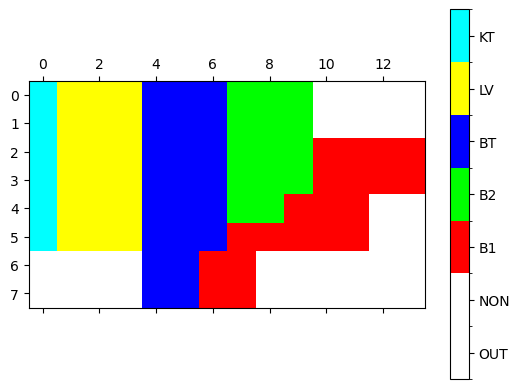

In [48]:
import numpy as np
from GridDrawer import GridDrawer
import trivial_utils
import random
threshold_diff_ratio = .5


def grid_print(sample_grid, no=0, format='png', prefix = 'test',):
    filename, current_step = trivial_utils.create_filename_in_order(format, prefix, no)
    GridDrawer.color_cells_by_value(sample_grid, filename)
    
def all_active_neighbors(cell, floorplan):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    neighbors = []
    for d in directions:
        neighbor = (cell[0] + d[0], cell[1] + d[1])
        if 0 <= neighbor[0] < floorplan.shape[0] and 0 <= neighbor[1] < floorplan.shape[1] and floorplan[neighbor] > 0:
            neighbors.append(neighbor)
    return neighbors


def get_protruding_cells(floorplan):
    protruding_cells_dict = {}
    for row in range(floorplan.shape[0]):
        for col in range(floorplan.shape[1]):
            room_number = floorplan[row, col]
            if room_number > 0:
                if room_number not in protruding_cells_dict:
                    protruding_cells_dict[room_number] = []
                cell = (row, col)
                neighbors = all_active_neighbors(cell, floorplan)
                different_neighbors = sum(floorplan[neighbor] != room_number for neighbor in neighbors)
                diff_ratio = different_neighbors / len(neighbors)
                if diff_ratio > threshold_diff_ratio:
                    protruding_cells_dict[room_number].append(cell)
    # 빈 리스트는 제거하고 값이 있는 헬만 가져온다.
    protruding_cells_dict = {k:v for k,v in protruding_cells_dict.items() if v}
    return protruding_cells_dict


def get_protruding_cells_room_number(floorplan, room_number):
    row, col = find_coordinates(floorplan, room_number)
    protruding_cells_room = []
    if room_number > 0:
        neighbors = all_active_neighbors((row, col), floorplan)
        different_neighbors = sum(floorplan[neighbor] != room_number for neighbor in neighbors)
        diff_ratio = different_neighbors / len(neighbors)
        if diff_ratio > threshold_diff_ratio:
            protruding_cells_room.append((row, col))
    return protruding_cells_room


def if_protruding_cell(floorplan, cell):
    neighbors = all_active_neighbors(cell, floorplan)
    room_number = floorplan[cell]
    different_neighbors = sum(floorplan[neighbor] != room_number for neighbor in neighbors)
    diff_ratio = different_neighbors / len(neighbors)
    if diff_ratio > threshold_diff_ratio:
        return True, diff_ratio
    else: return True, diff_ratio

def rooms_cells(floorplan):
    cell_dict = {}
    for row in range(floorplan.shape[0]):
        for col in range(floorplan.shape[1]):
            room_number = floorplan[row, col]
            if room_number > 0:
                if room_number not in cell_dict:
                    cell_dict[room_number] = []
                cell_dict[room_number].append((row, col))
    return cell_dict

def cell_swap(floorplan, cell1, cell2):
    temp = floorplan[cell1[0], cell1[1]]
    floorplan[cell1[0], cell1[1]] = floorplan[cell2[0], cell2[1]]
    floorplan[cell2[0], cell2[1]] = temp
    return temp


    

def find_corner_cells(floorplan, cells):
    extreme_cell = None
    max_diff_ratio = 0.4
    diff_ratios = {}

    for cell in cells:
        neighbors = all_active_neighbors(cell, floorplan)
        max_neighbors = len(neighbors)
        num_different_neighbors = sum(1 for neighbor in neighbors if floorplan[neighbor[0], neighbor[1]] != floorplan[cell[0], cell[1]])

        diff_ratio = num_different_neighbors / max_neighbors
        diff_ratios[cell] = diff_ratio

    # Find the cell with the maximum diff_ratio
    extreme_cell = max(diff_ratios, key=diff_ratios.get)
    return extreme_cell, diff_ratios[extreme_cell]

def find_neighbor_cell_to_swap(floorplan, extreme_cell, extreme_diff_ratio):
    neighbors = all_active_neighbors(extreme_cell, floorplan)
    max_neighbors = len(neighbors)
    max_diff_ratio = -1
    concave_cell = None

    diff_ratio_dict = {}
    for cell in neighbors:
        if floorplan[cell[0], cell[1]] != floorplan[extreme_cell[0], extreme_cell[1]]: #현재 셀은 extreme_cel의 인접셀이며, 모든 인접셀 비교해서 다른 방이면 다음 실행 
            neighbors_of_neighbor = all_active_neighbors(cell, floorplan) # 그 인접셀의 모든 유효 인접셀을 구한 후
            max_neighbors = len(neighbors_of_neighbor)
            num_different_neighbors = sum(1 for neighbor in neighbors_of_neighbor if floorplan[neighbor[0], neighbor[1]] != floorplan[cell[0], cell[1]]) # 그 인접셀의 유효인접셀들이 extreme_cell의 인접셀과 다른 개수를 구한다.

            diff_ratio = num_different_neighbors / max_neighbors
            diff_ratio_dict[cell] = diff_ratio # 여기서 제일 큰 값을 구하기 위해서
            print(f'[find_neighbor_cell_to_swap] {cell} diff_ratio = {diff_ratio} > max_diff_ratio = {max_diff_ratio} and diff_ratio={diff_ratio} > extreme_diff_ratio {extreme_diff_ratio}')
    cell  = max(diff_ratio_dict, key=diff_ratio_dict.get)
    diff_ratio = diff_ratio_dict[cell]
    print(f'[find_neighbor_cell_to_swap] cell={cell}, diff_ratio={diff_ratio}')
    return cell
    
    # if diff_ratio > max_diff_ratio and diff_ratio > extreme_diff_ratio:        
    #             max_diff_ratio = diff_ratio
    #             concave_cell = cell

    return concave_cell

def smooth_floorplan(floorplan, iterations=1):
    for _ in range(iterations):
        cell_dict = rooms_cells(floorplan)
        for room_number, cells in cell_dict.items():
            extreme_cell, extreme_diff_ratio = find_extreme_cell(floorplan, cells)
            print(f'Room{room_number}, extreme_cell = {extreme_cell} extreme_diff_ratio = {extreme_diff_ratio}')
            if extreme_diff_ratio >= 0.6:
                swapping_cell = find_neighbor_cell_to_swap(floorplan, extreme_cell, extreme_diff_ratio)
                print(f'swapping_cell = {swapping_cell}')
                if extreme_cell and swapping_cell and is_valid_swap(floorplan, extreme_cell, swapping_cell):
                    print(f'swapping room{room_number} extreme_cell={extreme_cell} with swapping_cell={swapping_cell}')
                    floorplan[extreme_cell[0], extreme_cell[1]], floorplan[swapping_cell[0], swapping_cell[1]] = (
                        floorplan[swapping_cell[0], swapping_cell[1]], floorplan[extreme_cell[0], extreme_cell[1]]
                    )
        filename, current_step = trivial_utils.create_filename_in_order('png', 'Step', 0)
        GridDrawer.color_cells_by_value(sample_grid, filename)
    return floorplan

def get_diff_ratio_cells(floorplan, cells):
    diff_ratio_dict = {}
    for cell in cells:
        neighbors = all_active_neighbors(cell, floorplan)
        max_neighbors = len(neighbors)
        num_diff_neighbors =  sum(1 for neighbor in neighbors if floorplan[neighbor[0], neighbor[1]] != floorplan[cell[0], cell[1]])
        diff_ratio = num_diff_neighbors / max_neighbors
        diff_ratio_dict[cell] = diff_ratio
        return diff_ratio_dict
    
def get_diff_ratio_neighbors(floorplan, cell):
    cells = all_active_neighbors(cell, floorplan)
    diff_ratio_dict = {}
    for neighbor_cell in cells:
        if floorplan[cell] != floorplan[neighbor_cell] :
            diff_ratio = get_diff_ratio_cell(floorplan, neighbor_cell)
            diff_ratio_dict[neighbor_cell] = diff_ratio
    return diff_ratio_dict

def get_diff_ratio_cell(floorplan, cell):
    neighbors = all_active_neighbors(cell, floorplan)
    max_neighbors = len(neighbors)  
    num_diff_neighbors =  sum(1 for neighbor in neighbors if floorplan[neighbor[0], neighbor[1]] != floorplan[cell[0], cell[1]])
    diff_ratio = num_diff_neighbors / max_neighbors

    return diff_ratio
   
def is_valid_swap(floorplan, cell1, cell2):
    # Perform the swap    
    # diff_ratio_cell1 = get_diff_ratio_cell(floorplan, cell1)
    # diff_ratio_cell1_neighbors = get_diff_ratio_neighbors(floorplan, cell1)
    # diff_ratio_cell2 = get_diff_ratio_cell(floorplan, cell2)
    # diff_ratio_cell2_neighbors = get_diff_ratio_neighbors(floorplan, cell2)
    # print(f'{cell1}{diff_ratio_cell1:.2f}:{diff_ratio_cell1_neighbors}')
    # print(f'{cell2}{diff_ratio_cell2:.2f}:{diff_ratio_cell2_neighbors}')

    temp = cell_swap(floorplan, cell1, cell2)
    # print(f'after {cell1} swap {cell2} : \n{floorplan }')

    # diff_ratio_cell1 = get_diff_ratio_cell(floorplan, cell1)
    # diff_ratio_cell1_neighbors = get_diff_ratio_neighbors(floorplan, cell1)
    # diff_ratio_cell2 = get_diff_ratio_cell(floorplan, cell2)
    # diff_ratio_cell2_neighbors = get_diff_ratio_neighbors(floorplan, cell2)
    # print(f'{cell1}{diff_ratio_cell1:.2f}:{diff_ratio_cell1_neighbors}')
    # print(f'{cell2}{diff_ratio_cell2:.2f}:{diff_ratio_cell2_neighbors}')
    

    # Check if the swap maintains the rule
    neighbors1 = all_active_neighbors(cell1, floorplan)
    neighbors2 = all_active_neighbors(cell2, floorplan)

    # valid 변수는 neighbors1 중 하나가 cell1과 같은 값을 가지는지, 
    # neighbors2 중 하나가 cell2와 같은 값을 가지는지를 모두 확인하여 결정됩니다.
    # 두 조건이 모두 만족되면 valid는 True가 되고, 하나라도 만족되지 않으면 False가 됩니다.
    
    valid = any(floorplan[n[0], n[1]] == floorplan[cell1[0], cell1[1]] for n in neighbors1) and \
            any(floorplan[n[0], n[1]] == floorplan[cell2[0], cell2[1]] for n in neighbors2)


    # print(f'\t[is_valid_swap] neighbors of {cell1}{floorplan[cell1[0], cell1[1]]} = {[((n[0], n[1]), floorplan[n[0], n[1]]) for n in neighbors1]}={[floorplan[n[0], n[1]] for n in neighbors1]}')
    # print(f'\t[is_valid_swap] neighbors of {cell2}{floorplan[cell2[0], cell2[1]]} = {[((n[0], n[1]), floorplan[n[0], n[1]]) for n in neighbors2]}={[floorplan[n[0], n[1]] for n in neighbors2]}')
    print(f'\t[is_valid_swap] cell1{cell1},cell2{cell2} valid={valid}')

    # Revert the swap
    floorplan[cell2[0], cell2[1]] = floorplan[cell1[0], cell1[1]]
    floorplan[cell1[0], cell1[1]] = temp

    return valid

# 특정 룸 넘버에 해당하는 좌표를 찾는 함수
def find_coordinates(floorplan, room_number):
    coordinates = np.argwhere(floorplan == room_number)
    return [tuple(coord) for coord in coordinates]

def get_neighbors_room_numbers(floorplan, cell):
    neighbors = all_active_neighbors(cell, floorplan)
    cell_neighbors_room_number = []
    for neighbor in neighbors:
        if floorplan[cell] != floorplan[neighbor]:
            cell_neighbors_room_number.append(neighbor)
    return cell_neighbors_room_number

def change_room_cells(floorplan, room_number, cells):
    for cell in cells:
        cell_neighbors_room_numbers = get_neighbors_room_numbers(floorplan, cell) # 같은 건 이미 필터링됨
        if cell_neighbors_room_numbers:
            print(f'cell_neighbors_room_numbers={cell_neighbors_room_numbers}')
            selected_neighbor_cell = random.choice(cell_neighbors_room_numbers)
            selected_neighbor_cell_room = floorplan[selected_neighbor_cell]
            floorplan[cell] = selected_neighbor_cell_room
            print(f'cell{cell} changed from {room_number}to{floorplan[cell]}')

def change_room_cell(floorplan, room_number, cell):
    cell_neighbors_room_numbers = get_neighbors_room_numbers(floorplan, cell) # 같은 건 이미 필터링됨
    if cell_neighbors_room_numbers:
        print(f'cell_neighbors_room_numbers={cell_neighbors_room_numbers}')
        selected_neighbor_cell = random.choice(cell_neighbors_room_numbers)
        selected_neighbor_cell_room = floorplan[selected_neighbor_cell]
        floorplan[cell] = selected_neighbor_cell_room
        print(f'cell{cell} changed from [{room_number}] to [{floorplan[cell]}]')
        return selected_neighbor_cell_room
    else:
        print(f'change_room_cell({room_number},{cell} ) not changed anything becuase cell_neighbors_room_numbers={cell_neighbors_room_numbers} not empty')
        return room_number

def remove_cell_from_protruding_cells_dict_list(protruding_cells_dict, key_to_modify, item_to_remove):
    if key_to_modify in protruding_cells_dict:
        if item_to_remove in protruding_cells_dict[key_to_modify]:
            protruding_cells_dict[key_to_modify].remove(item_to_remove)
            if not protruding_cells_dict[key_to_modify]:
                del protruding_cells_dict[key_to_modify]
                
def add_cell_to_protruding_cells_dict_list(protruding_cells_dict, key_to_modify, cell):
    if key_to_modify not in protruding_cells_dict:
        protruding_cells_dict[key_to_modify] = [cell]
    else:
        protruding_cells_dict[key_to_modify].append(cell)
    
# 방번호를 변경
def change_room_number_from_protruding_cells_dict_list(protruding_cells_dict, item_to_move, old_key, new_key):
    print(f'\t\t[change_room_number_from_protruding_cells_dict_list] {item_to_move} from {old_key} to {new_key}')
    if old_key in protruding_cells_dict and item_to_move in protruding_cells_dict[old_key]:
        # when (5,7) from 1 to 3
        # 1 in protruding_cells_dict and (5,7) in protruding_cells_dict
        print(f'\t\t{old_key} in {protruding_cells_dict} and {item_to_move} in {protruding_cells_dict[old_key]}')
        protruding_cells_dict[old_key].remove(item_to_move)
        
        # old_key의 리스트가 비어있으면 old_key 제거
        if not protruding_cells_dict[old_key]:
            del protruding_cells_dict[old_key]
        
        # new_key가 없으면 생성하고 추가
        if new_key not in protruding_cells_dict:
            protruding_cells_dict[new_key] = []
        protruding_cells_dict[new_key].append(item_to_move)

def update_protruding_cells_dict(floorplan, room_number, new_room_number, selected_cell, protruding_cells_dict):
    print(f'\tcurrent protruding_cells_dict...{protruding_cells_dict}')
    print(f'new_room_number={new_room_number}, selected_cell = {selected_cell}')
    current_diff_ratio = get_diff_ratio_cell (floorplan, selected_cell)
    # 방번호 변경
    if current_diff_ratio > threshold_diff_ratio:        
        change_room_number_from_protruding_cells_dict_list(protruding_cells_dict, selected_cell, room_number, new_room_number )
        print(f'\tchanged_room_number from {room_number} to {new_room_number}')
        print(f'\tresult protruding_cells_dict...{protruding_cells_dict}')
    if current_diff_ratio <= threshold_diff_ratio :
        remove_cell_from_protruding_cells_dict_list(protruding_cells_dict, room_number, selected_cell)
        print(f'\tremove_room_number from {room_number} from {selected_cell}')
        print(f'\tresult protruding_cells_dict...{protruding_cells_dict}')
    
    
    # neighbors_diff_ratio를 차례로 방문해서 값을 비교해서 있어야 하는데 없으면 protruding_cells_dict[selected_cell]에 neighbors_diff_ratio의 키값을 추가 없어야 하는데 있으면 삭제
    print(f'\tupdate_protruding_cells_dict current_diff_ratio of {selected_cell} = {current_diff_ratio}')
    neighbors_diff_ratio = get_diff_ratio_neighbors(floorplan, selected_cell) # room_number가 바뀌지 않았음
    print(f'\tneighbors_diff_ratio of {new_room_number}:{selected_cell} = {neighbors_diff_ratio}')
    
    for neighbor_cell, neighbor_new_diff in neighbors_diff_ratio.items():
        neighbor_cell_room_number = floorplan[neighbor_cell]
        if neighbor_new_diff > threshold_diff_ratio: # 셀의 변경으로 인해 네이버가 변경되었으므로 protruding_cells_dict에 추가
            add_cell_to_protruding_cells_dict_list(protruding_cells_dict, neighbor_cell_room_number, neighbor_cell)
            print(f'\tneighbor_cell {neighbor_cell} added to protruding_cells_dict => {protruding_cells_dict}')
        else: #  해당 셀은 이동으로 인해  더이상 돌출되지 않았다. 그러므로 제거
            neighbor_room_number = floorplan[neighbor_cell]
            remove_cell_from_protruding_cells_dict_list(protruding_cells_dict,neighbor_room_number, neighbor_cell)
            print(f'\tdebugging...neighbor_cell {neighbor_cell} removed from protruding_cells_dict => {protruding_cells_dict}')
    
    diff_ratio_dict = protruding_cells_dict[selected_cell] = neighbors_diff_ratio
    


def exchange_protruding_cells(floorplan, iterations=1000):
    for _ in range(iterations):
        protruding_cells_dict = get_protruding_cells(floorplan)
        if not protruding_cells_dict: break
        print(f'protruding_cells_dict = {protruding_cells_dict} ')
        swap_neighbor_success = False
        
        # 순차적으로 하면 업데이트된 것이 반영이 안되니까 랜덤하게 합시다.
        
        room_number  = random.choice(list(protruding_cells_dict.keys()))
        cells_in_room_number = protruding_cells_dict[room_number]
        selected_cell = random.choice(cells_in_room_number)
        print(f'For Room({room_number}):  cell {selected_cell}')
        new_room_number = change_room_cell(floorplan, room_number, selected_cell)
        print(f'floorplan after change_room_cell {selected_cell}\n{floorplan}')
        update_protruding_cells_dict(floorplan, room_number,new_room_number, selected_cell, protruding_cells_dict) # 해당 셀과 그 모든 이웃 셀의 diff_ratio를 다시 구해서  protruding_cells_dict를 업데이트한다. 
        # 
        # for room_number, protruding_cells in protruding_cells_dict.items():
        #     print(f'for Room {room_number}: protruding_cell{protruding_cells}')
        #     if not protruding_cells:
        #         continue
        #     
        #     change_room_cells(floorplan, room_number, protruding_cells)
        #     print(floorplan)


# Test the function
sample_grid = np.array([
    [ 5,  4,  4,  4,  4,  3,  3,  3,  3,  2, -1, -1, -1, -1],
    [ 5,  4,  4,  4,  3,  3,  3,  2,  2,  2, -1, -1, -1, -1],
    [ 5,  4,  4,  4,  3,  3,  3,  2,  2,  2,  2,  2,  1,  1],
    [ 5,  4,  4,  4,  3,  3,  3,  2,  2,  2,  1,  1,  1,  1],
    [ 5,  4,  4,  4,  3,  3,  3,  2,  2,  1,  1,  1, -1, -1],
    [ 5,  5,  5,  4,  3,  3,  3,  1,  1,  1,  1,  1, -1, -1],
    [-1, -1, -1, -1,  3,  3,  1,  1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1,  3,  1,  1,  1, -1, -1, -1, -1, -1, -1]
])

print("Original Grid:")
print(sample_grid)
 
# grid_print(sample_grid, 0)
smoothed_grid = exchange_protruding_cells(sample_grid, iterations=10)
grid_print(sample_grid, 1)
# 
# 
# print("\nSmoothed Grid:")
# print(smoothed_grid)


Original Grid:
[[ 5  4  4  4  4  3  3  3  3  2 -1 -1 -1 -1]
 [ 5  4  4  4  3  3  3  2  2  2 -1 -1 -1 -1]
 [ 5  4  4  4  3  3  3  2  2  2  2  2  1  1]
 [ 5  4  4  4  3  3  3  2  2  2  1  1  1  1]
 [ 5  4  4  4  3  3  3  2  2  1  1  1 -1 -1]
 [ 5  5  5  4  3  3  3  1  1  1  1  1 -1 -1]
 [-1 -1 -1 -1  3  3  1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  3  1  1  1 -1 -1 -1 -1 -1 -1]]
protruding_cells_dict = {5: [(5, 2)], 4: [(0, 4), (5, 3)], 3: [(0, 8)], 2: [(2, 11)], 1: [(7, 5)]} 
For Room(3):  cell (0, 8)
cell_neighbors_room_numbers=[(1, 8), (0, 9)]
cell(0, 8) changed from [3] to [2]
floorplan after change_room_cell (0, 8)
[[ 5  4  4  4  4  3  3  3  2  2 -1 -1 -1 -1]
 [ 5  4  4  4  3  3  3  2  2  2 -1 -1 -1 -1]
 [ 5  4  4  4  3  3  3  2  2  2  2  2  1  1]
 [ 5  4  4  4  3  3  3  2  2  2  1  1  1  1]
 [ 5  4  4  4  3  3  3  2  2  1  1  1 -1 -1]
 [ 5  5  5  4  3  3  3  1  1  1  1  1 -1 -1]
 [-1 -1 -1 -1  3  3  1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  3  1  1  1 -1 -1 -1 -1 -1 -1]]
	current protrudi

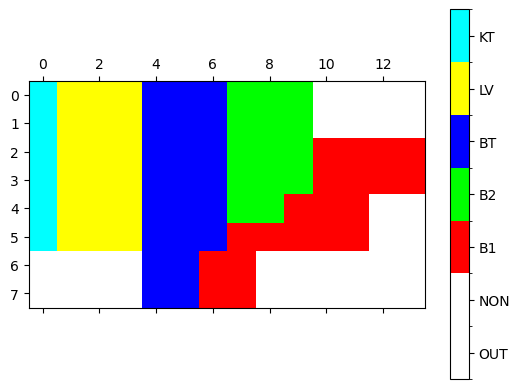

In [13]:
import numpy as np
from GridDrawer import GridDrawer
import trivial_utils
import random

threshold_diff_ratio = .5


def grid_print(sample_grid, no=0, format='png', prefix='test', ):
    filename, current_step = trivial_utils.create_filename_in_order(format, prefix, no)
    GridDrawer.color_cells_by_value(sample_grid, filename)


def all_active_neighbors(cell, floorplan):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    neighbors = []
    for d in directions:
        neighbor = (cell[0] + d[0], cell[1] + d[1])
        if 0 <= neighbor[0] < floorplan.shape[0] and 0 <= neighbor[1] < floorplan.shape[1] and floorplan[neighbor] > 0:
            neighbors.append(neighbor)
    return neighbors


def get_protruding_cells(floorplan):
    protruding_cells_dict = {}
    for row in range(floorplan.shape[0]):
        for col in range(floorplan.shape[1]):
            room_number = floorplan[row, col]
            if room_number > 0:
                if room_number not in protruding_cells_dict:
                    protruding_cells_dict[room_number] = []
                cell = (row, col)
                neighbors = all_active_neighbors(cell, floorplan)
                different_neighbors = sum(floorplan[neighbor] != room_number for neighbor in neighbors)
                diff_ratio = different_neighbors / len(neighbors)
                if diff_ratio > threshold_diff_ratio:
                    protruding_cells_dict[room_number].append(cell)
    # 빈 리스트는 제거하고 값이 있는 헬만 가져온다.
    protruding_cells_dict = {k: v for k, v in protruding_cells_dict.items() if v}
    return protruding_cells_dict


def rooms_cells(floorplan):
    cell_dict = {}
    for row in range(floorplan.shape[0]):
        for col in range(floorplan.shape[1]):
            room_number = floorplan[row, col]
            if room_number > 0:
                if room_number not in cell_dict:
                    cell_dict[room_number] = []
                cell_dict[room_number].append((row, col))
    return cell_dict


def cell_swap(floorplan, cell1, cell2):
    temp = floorplan[cell1[0], cell1[1]]
    floorplan[cell1[0], cell1[1]] = floorplan[cell2[0], cell2[1]]
    floorplan[cell2[0], cell2[1]] = temp
    return temp


def find_neighbor_cell_to_swap(floorplan, extreme_cell, extreme_diff_ratio):
    neighbors = all_active_neighbors(extreme_cell, floorplan)
    max_neighbors = len(neighbors)
    max_diff_ratio = -1
    concave_cell = None

    diff_ratio_dict = {}
    for cell in neighbors:
        if floorplan[cell[0], cell[1]] != floorplan[
            extreme_cell[0], extreme_cell[1]]:  # 현재 셀은 extreme_cel의 인접셀이며, 모든 인접셀 비교해서 다른 방이면 다음 실행
            neighbors_of_neighbor = all_active_neighbors(cell, floorplan)  # 그 인접셀의 모든 유효 인접셀을 구한 후
            max_neighbors = len(neighbors_of_neighbor)
            num_different_neighbors = sum(1 for neighbor in neighbors_of_neighbor if
                                          floorplan[neighbor[0], neighbor[1]] != floorplan[
                                              cell[0], cell[1]])  # 그 인접셀의 유효인접셀들이 extreme_cell의 인접셀과 다른 개수를 구한다.

            diff_ratio = num_different_neighbors / max_neighbors
            diff_ratio_dict[cell] = diff_ratio  # 여기서 제일 큰 값을 구하기 위해서
            print(
                f'[find_neighbor_cell_to_swap] {cell} diff_ratio = {diff_ratio} > max_diff_ratio = {max_diff_ratio} and diff_ratio={diff_ratio} > extreme_diff_ratio {extreme_diff_ratio}')
    cell = max(diff_ratio_dict, key=diff_ratio_dict.get)
    diff_ratio = diff_ratio_dict[cell]
    print(f'[find_neighbor_cell_to_swap] cell={cell}, diff_ratio={diff_ratio}')
    return cell

    # if diff_ratio > max_diff_ratio and diff_ratio > extreme_diff_ratio:
    #             max_diff_ratio = diff_ratio
    #             concave_cell = cell

    return concave_cell

def get_diff_ratio_neighbors(floorplan, cell):
    cells = all_active_neighbors(cell, floorplan)
    diff_ratio_dict = {}
    for neighbor_cell in cells:
        if floorplan[cell] != floorplan[neighbor_cell]:
            diff_ratio = get_diff_ratio_cell(floorplan, neighbor_cell)
            diff_ratio_dict[neighbor_cell] = diff_ratio
    return diff_ratio_dict


def get_diff_ratio_cell(floorplan, cell):
    neighbors = all_active_neighbors(cell, floorplan)
    max_neighbors = len(neighbors)
    num_diff_neighbors = sum(
        1 for neighbor in neighbors if floorplan[neighbor[0], neighbor[1]] != floorplan[cell[0], cell[1]])
    diff_ratio = num_diff_neighbors / max_neighbors
    return diff_ratio

def get_neighbors_room_numbers(floorplan, cell):
    neighbors = all_active_neighbors(cell, floorplan)
    cell_neighbors_room_number = []
    for neighbor in neighbors:
        if floorplan[cell] != floorplan[neighbor]:
            cell_neighbors_room_number.append(neighbor)
    return cell_neighbors_room_number


def change_room_cells(floorplan, room_number, cells):
    for cell in cells:
        cell_neighbors_room_numbers = get_neighbors_room_numbers(floorplan, cell)  # 같은 건 이미 필터링됨
        if cell_neighbors_room_numbers:
            print(f'cell_neighbors_room_numbers={cell_neighbors_room_numbers}')
            selected_neighbor_cell = random.choice(cell_neighbors_room_numbers)
            selected_neighbor_cell_room = floorplan[selected_neighbor_cell]
            floorplan[cell] = selected_neighbor_cell_room
            print(f'cell{cell} changed from {room_number}to{floorplan[cell]}')


def change_room_cell(floorplan, room_number, cell):
    cell_neighbors_room_numbers = get_neighbors_room_numbers(floorplan, cell)  # 같은 건 이미 필터링됨
    if cell_neighbors_room_numbers:
        print(f'cell_neighbors_room_numbers={cell_neighbors_room_numbers}')
        selected_neighbor_cell = random.choice(cell_neighbors_room_numbers)
        selected_neighbor_cell_room = floorplan[selected_neighbor_cell]
        floorplan[cell] = selected_neighbor_cell_room
        print(f'cell{cell} changed from [{room_number}] to [{floorplan[cell]}]')
        return selected_neighbor_cell_room
    else:
        print(
            f'change_room_cell({room_number},{cell} ) not changed anything becuase cell_neighbors_room_numbers={cell_neighbors_room_numbers} not empty')
        return room_number


def remove_cell_from_protruding_cells_dict_list(protruding_cells_dict, key_to_modify, item_to_remove):
    if key_to_modify in protruding_cells_dict:
        if item_to_remove in protruding_cells_dict[key_to_modify]:
            protruding_cells_dict[key_to_modify].remove(item_to_remove)
            if not protruding_cells_dict[key_to_modify]:
                del protruding_cells_dict[key_to_modify]


def add_cell_to_protruding_cells_dict_list(protruding_cells_dict, key_to_modify, cell):
    if key_to_modify not in protruding_cells_dict:
        protruding_cells_dict[key_to_modify] = [cell]
    else:
        protruding_cells_dict[key_to_modify].append(cell)


# 방번호를 변경
def change_room_number_from_protruding_cells_dict_list(protruding_cells_dict, item_to_move, old_key, new_key):
    print(f'\t\t[change_room_number_from_protruding_cells_dict_list] {item_to_move} from {old_key} to {new_key}')
    if old_key in protruding_cells_dict and item_to_move in protruding_cells_dict[old_key]:
        # when (5,7) from 1 to 3
        # 1 in protruding_cells_dict and (5,7) in protruding_cells_dict
        print(f'\t\t{old_key} in {protruding_cells_dict} and {item_to_move} in {protruding_cells_dict[old_key]}')
        protruding_cells_dict[old_key].remove(item_to_move)

        # old_key의 리스트가 비어있으면 old_key 제거
        if not protruding_cells_dict[old_key]:
            del protruding_cells_dict[old_key]

        # new_key가 없으면 생성하고 추가
        if new_key not in protruding_cells_dict:
            protruding_cells_dict[new_key] = []
        protruding_cells_dict[new_key].append(item_to_move)


def update_protruding_cells_dict(floorplan, room_number, new_room_number, selected_cell, protruding_cells_dict):
    print(f'\tcurrent protruding_cells_dict...{protruding_cells_dict}')
    print(f'new_room_number={new_room_number}, selected_cell = {selected_cell}')
    current_diff_ratio = get_diff_ratio_cell(floorplan, selected_cell)
    # 방번호 변경
    if current_diff_ratio > threshold_diff_ratio:
        change_room_number_from_protruding_cells_dict_list(protruding_cells_dict, selected_cell, room_number,
                                                           new_room_number)
        print(f'\tchanged_room_number from {room_number} to {new_room_number}')
        print(f'\tresult protruding_cells_dict...{protruding_cells_dict}')
    if current_diff_ratio <= threshold_diff_ratio:
        remove_cell_from_protruding_cells_dict_list(protruding_cells_dict, room_number, selected_cell)
        print(f'\tremove_room_number from {room_number} from {selected_cell}')
        print(f'\tresult protruding_cells_dict...{protruding_cells_dict}')

    # neighbors_diff_ratio를 차례로 방문해서 값을 비교해서 있어야 하는데 없으면 protruding_cells_dict[selected_cell]에 neighbors_diff_ratio의 키값을 추가 없어야 하는데 있으면 삭제
    print(f'\tupdate_protruding_cells_dict current_diff_ratio of {selected_cell} = {current_diff_ratio}')
    neighbors_diff_ratio = get_diff_ratio_neighbors(floorplan, selected_cell)  # room_number가 바뀌지 않았음
    print(f'\tneighbors_diff_ratio of {new_room_number}:{selected_cell} = {neighbors_diff_ratio}')

    for neighbor_cell, neighbor_new_diff in neighbors_diff_ratio.items():
        neighbor_cell_room_number = floorplan[neighbor_cell]
        if neighbor_new_diff > threshold_diff_ratio:  # 셀의 변경으로 인해 네이버가 변경되었으므로 protruding_cells_dict에 추가
            add_cell_to_protruding_cells_dict_list(protruding_cells_dict, neighbor_cell_room_number, neighbor_cell)
            print(f'\tneighbor_cell {neighbor_cell} added to protruding_cells_dict => {protruding_cells_dict}')
        else:  # 해당 셀은 이동으로 인해  더이상 돌출되지 않았다. 그러므로 제거
            neighbor_room_number = floorplan[neighbor_cell]
            remove_cell_from_protruding_cells_dict_list(protruding_cells_dict, neighbor_room_number, neighbor_cell)
            print(
                f'\tdebugging...neighbor_cell {neighbor_cell} removed from protruding_cells_dict => {protruding_cells_dict}')

    diff_ratio_dict = protruding_cells_dict[selected_cell] = neighbors_diff_ratio


def exchange_protruding_cells(floorplan, iterations=10):
    for _ in range(iterations):
        protruding_cells_dict = get_protruding_cells(floorplan)
        if not protruding_cells_dict: break
        print(f'protruding_cells_dict = {protruding_cells_dict} ')
        swap_neighbor_success = False

        # 순차적으로 하면 업데이트된 것이 반영이 안되니까 랜덤하게 합시다.

        room_number = random.choice(list(protruding_cells_dict.keys()))
        cells_in_room_number = protruding_cells_dict[room_number]
        selected_cell = random.choice(cells_in_room_number)
        print(f'For Room({room_number}):  cell {selected_cell}')
        new_room_number = change_room_cell(floorplan, room_number, selected_cell)
        print(f'floorplan after change_room_cell {selected_cell}\n{floorplan}')
        update_protruding_cells_dict(floorplan, room_number, new_room_number, selected_cell,
                                     protruding_cells_dict)  # 해당 셀과 그 모든 이웃 셀의 diff_ratio를 다시 구해서  protruding_cells_dict를 업데이트한다.

if __name__ == '__main__':
    # Test the function
    sample_grid = np.array([
        [5, 4, 4, 4, 4, 3, 3, 3, 3, 2, -1, -1, -1, -1],
        [5, 4, 4, 4, 3, 3, 3, 2, 2, 2, -1, -1, -1, -1],
        [5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1],
        [5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1],
        [5, 4, 4, 4, 3, 3, 3, 2, 2, 1, 1, 1, -1, -1],
        [5, 5, 5, 4, 3, 3, 3, 1, 1, 1, 1, 1, -1, -1],
        [-1, -1, -1, -1, 3, 3, 1, 1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, 3, 1, 1, 1, -1, -1, -1, -1, -1, -1]
    ])

    print("Original Grid:")
    print(sample_grid)

    # grid_print(sample_grid, 0)
    smoothed_grid = exchange_protruding_cells(sample_grid, iterations=50)
    grid_print(sample_grid, 1)
#
#
# print("\nSmoothed Grid:")
# print(smoothed_grid)


In [68]:
def is_consecutive_neighbors_same_room(floorplan, cell, direction):
    directions = {'north': [(-1,0), (-1,-1), (-1,1)],
                       'south': [(1,0), (1,-1), (1,1)],
                       'west' : [(0,-1), (-1,-1), (1, -1)],
                       'east': [(0,1), (-1,1), (1,1)]
                }
    consecutive3 = []
    rows, cols = floorplan.shape
    for d in directions[direction]:
        neighbor = (cell[0] + d[0], cell[1] + d[1])
        # 경계를 벗어났는지 확인
        if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
            consecutive3.append(neighbor)
    
    if len(consecutive3) < 3:
        return False
    is_consecutive = all([floorplan[n] == floorplan[cell] for n in consecutive3]) # 현재셀과 세 개의 연속셀이 모두 같으면
    # print(f'[is_consecutive_neighbors_same_room]{cell} to  is_consecutive = {is_consecutive}')
    return is_consecutive

def consecutive_neighbor_in_orientation(floorplan, cell):
    orientation = ['north', 'south', 'west', 'east']
    count_true = 0
    triple_match_directions = []
    for o in orientation:
        if is_consecutive_neighbors_same_room(floorplan, cell, o):
            triple_match_directions.append(o)
    # print(f'[{cell}]: triple_match_directions{triple_match_directions}')
    return triple_match_directions
        
def is_cascading_corner(triple_match_directions): # consecutive3_direction 세 셀이 같은 방향
    if len(triple_match_directions) != 2: return False
    if 'north' in triple_match_directions  or 'south' in triple_match_directions :
        if 'east'  in triple_match_directions or 'west' in triple_match_directions :
            return True
    if 'east' in  triple_match_directions or  'west' in triple_match_directions:
        if ('north' in triple_match_directions  or 'south' in triple_match_directions) :
            return True

def all_neighbors(cell, floorplan):
    directions4 = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    neighbors = []
    for d in directions4:
        neighbor = (cell[0] + d[0], cell[1] + d[1])
        if 0 <= neighbor[0] < floorplan.shape[0] and 0 <= neighbor[1] < floorplan.shape[1] and floorplan[
            neighbor] > 0:
            neighbors.append(neighbor)
    return neighbors

def get_diff_ratio_neighbors(floorplan, cell):
    # cells = all_active_neighbors8(cell, floorplan)
    cells = all_neighbors(cell, floorplan)
    diff_ratio_dict = {}
    for neighbor_cell in cells:
        if floorplan[cell] != floorplan[neighbor_cell]:
            diff_ratio = get_diff_ratio_cell(floorplan, neighbor_cell)
            diff_ratio_dict[neighbor_cell] = diff_ratio
    return diff_ratio_dict

def get_diff_ratio_cell(floorplan, cell):
    # neighbors = all_active_neighbors8(cell, floorplan)
    # neighbors = all_active_neighbors(cell, floorplan)
    neighbors = all_neighbors(cell, floorplan)
    max_neighbors = len(neighbors)
    if max_neighbors == 0. :
        print(neighbors, cell)
    num_diff_neighbors = sum(
        1 for neighbor in neighbors if floorplan[neighbor[0], neighbor[1]] != floorplan[cell[0], cell[1]])
    diff_ratio = num_diff_neighbors / max_neighbors
    # print(f'max_neighbors = {max_neighbors}, num_diff_neighbors = {num_diff_neighbors}, diff_ratio = {diff_ratio} returning {diff_ratio}')
    # print(f'\t\t\t[get_diff_ratio_cell] ...when {cell}={floorplan[cell]}s diff_ratio = {diff_ratio} max_neighbors {max_neighbors}')
    return diff_ratio

def create_diff_ratio_array(floorplan):
    diff_ratios = np.zeros_like(floorplan, dtype=float)
    
    for i in range(floorplan.shape[0]):
        for j in range(floorplan.shape[1]):
            cell = (i,j)            
            if is_valid_cell(floorplan, cell):
                diff_ratios[cell] = get_diff_ratio_cell(floorplan, cell)
                print(f'{cell} diff_ratio={diff_ratios[cell]}')
    return diff_ratios

def is_valid_cell(floorplan, cell):
    is_valid = 0 <= cell[0] < floorplan.shape[0] and 0 <= cell[1] < floorplan.shape[1] and floorplan[cell] > 0
    # print(f'{cell} is_valid={is_valid}')
    return is_valid
        
import numpy as np
floorplan = np.array([
        [5, 4, 4, 4, 4, 3, 3, 3, 3, 2, -1, -1, -1, -1],
        [5, 4, 4, 4, 3, 3, 3, 2, 2, 2, -1, -1, -1, -1],
        [5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1],
        [5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1],
        [5, 4, 4, 4, 3, 3, 3, 2, 2, 1, 1, 1, -1, -1],
        [5, 5, 5, 4, 3, 3, 3, 1, 1, 1, 1, 1, -1, -1],
        [-1,-1,-1,-1,3, 3, 1, 1, -1, -1, -1, -1, -1, -1],
        [-1,-1,-1,-1,3, 1, 1, 1, -1, -1, -1, -1, -1, -1]
    ])

# 경계 셀 여부를 저장할 배열 초기화
boundary_cells = np.full(floorplan.shape, False, dtype=int)

# 모든 셀에 대해 경계 셀 여부를 판단
for i in range(floorplan.shape[0]):
    for j in range(floorplan.shape[1]):
        if floorplan[i, j] == -1:
            boundary_cells[i, j] = -1
        else:
            boundary_cells[i, j] = is_boundary_cell(floorplan, (i, j))

# 결과 출력
for row in boundary_cells:
    print("[", " ".join(f"{int(x):2}" if x != -1 else f"{x:2}" for x in row), "]")
    
    
np.set_printoptions(precision=1, suppress=True)
diff_ratios = create_diff_ratio_array(floorplan)
print(f'diff_ratios=\n{diff_ratios}')
aligned_corners = np.zeros_like(floorplan)
directions = ['west', 'east', 'south', 'north']
for i in range(floorplan.shape[0]):
    for j in range(floorplan.shape[1]):
        cell = (i,j)
        if is_valid_cell(floorplan, cell) :
        # for direction in directions:
        #     aligned3 = is_consecutive_neighbors_same_room(floorplan, cell, direction)
        #     print(f'{cell}:{direction} = {aligned3}')
            
            triple_match_directions = consecutive_neighbor_in_orientation(floorplan, cell)
            print(f'triple_match_directions {cell} = {triple_match_directions}')
            aligned_corners[i, j] = is_cascading_corner( triple_match_directions)
print(f'aligned_corners=\n{aligned_corners}')
mask = (diff_ratios > 0.5) | (( diff_ratios == 0.5) & (aligned_corners == 1))
print(f'protruding_mask = {mask.astype(int)}')


# for idx in np.ndindex(floorplan.shape):
#     print(f"{idx}: {floorplan[idx]}")

# consecutive_neighbor_in_orientation(floorplan, cell)

(0, 0) diff_ratio=0.5
(0, 1) diff_ratio=0.3333333333333333
(0, 2) diff_ratio=0.0
(0, 3) diff_ratio=0.0
(0, 4) diff_ratio=0.6666666666666666
(0, 5) diff_ratio=0.3333333333333333
(0, 6) diff_ratio=0.0
(0, 7) diff_ratio=0.3333333333333333
(0, 8) diff_ratio=0.6666666666666666
(0, 9) diff_ratio=0.5
(1, 0) diff_ratio=0.3333333333333333
(1, 1) diff_ratio=0.25
(1, 2) diff_ratio=0.0
(1, 3) diff_ratio=0.25
(1, 4) diff_ratio=0.5
(1, 5) diff_ratio=0.0
(1, 6) diff_ratio=0.25
(1, 7) diff_ratio=0.5
(1, 8) diff_ratio=0.25
(1, 9) diff_ratio=0.0
(2, 0) diff_ratio=0.3333333333333333
(2, 1) diff_ratio=0.25
(2, 2) diff_ratio=0.0
(2, 3) diff_ratio=0.25
(2, 4) diff_ratio=0.25
(2, 5) diff_ratio=0.0
(2, 6) diff_ratio=0.25
(2, 7) diff_ratio=0.25
(2, 8) diff_ratio=0.0
(2, 9) diff_ratio=0.0
(2, 10) diff_ratio=0.3333333333333333
(2, 11) diff_ratio=0.6666666666666666
(2, 12) diff_ratio=0.3333333333333333
(2, 13) diff_ratio=0.0
(3, 0) diff_ratio=0.3333333333333333
(3, 1) diff_ratio=0.25
(3, 2) diff_ratio=0.0
(3, 3) 